In [1]:
#import modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Open the data file and convert to a Data Frame
#Here I also separated randomly selected 20% of the data for later validation

data = pd.read_csv('C:\\Users\\HP\\Desktop\\Nevina Python\\GreyAtom\\Hackathon 2\\Train.csv')
#randomize the data
#data.sample(frac=1)
df=data.copy()
df.shape

(34226, 16)

In [2]:
df[["last_review", "reviews_per_month"]] = df[["last_review", "reviews_per_month"]].fillna(0)

#if there is no host name or listing name fill in None
df[["name", "host_name"]] = df[["name", "host_name"]].fillna("None")

#Drop rows were price of the listing is 0. We are not intersted in "free" 
#listings as they are most likely an error.
free = len(df[df.price == 0])
df = df[df.price != 0].copy()

#Print initial insights:
print("The initial dataset contained " + str(free)+ " listings with price of 0 USD, that had been removed")
print("There are " + str(len(df["id"].unique()))+" listings")
print("There are "+str(len(df.host_id.unique()))
      +" unique and indentifiable "+ "hosts.")
print("There are "+str(len(df[df["host_name"]=="None"]))
      +" unindentifiable "+ "hosts.")
print("Dataframe shape: "+str(df.shape))

The initial dataset contained 9 listings with price of 0 USD, that had been removed
There are 34217 listings
There are 27447 unique and indentifiable hosts.
There are 13 unindentifiable hosts.
Dataframe shape: (34217, 16)


In [3]:
df[(df["calculated_host_listings_count"]>1)][["host_id","calculated_host_listings_count"]].sort_values(by=['host_id']).head(10)

,host_id,calculated_host_listings_count
9126,2787,6
19854,2787,6
11199,2845,2
16342,2881,2
13925,2881,2
16417,3647,2
17983,3647,2
33161,3867,2
23292,3867,2
29722,4396,2


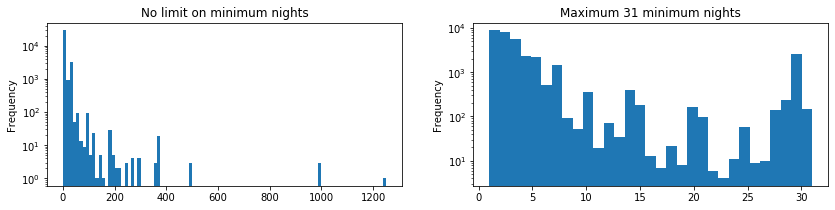

As a result of imposing minimum nights limit, 393 listings were removed.


In [4]:
df_old=df.copy()
df = df[df["minimum_nights"] <=31].copy()
removed_listings = len(df_old)-len(df)

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.hist(df_old.minimum_nights, bins=100, log=True)
ax1.set_ylabel("Frequency")
ax1.set_title("No limit on minimum nights")

ax2.hist(df.minimum_nights, bins=31, log=True)
ax2.set_ylabel("Frequency")
ax2.set_title("Maximum 31 minimum nights")

plt.show()

print("As a result of imposing minimum nightsdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0MAAADSCAYAAACIEhuUAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3df7xkdX3f8dfbxQ2CZlHBRn6sC1lCQ9NEyQ1YTVOTqF3EFZOmCppWDbI1htS0zSPijyqammCb2MRKYhZFlEQQqdpF1weaNIaaB1HQoIJI2ACGFcMP0QV/IvrpH+dcHK73x8ydmTtz5r6ej8c8ds53zjnz+c65e77ne74/TqoKSZIkSVpvHjTpACRJkiRpEqwMSZIkSVqXrAxJkiRJWpesDEmSJElal6wMSZIkSVqXrAxJkiRJWpesDGkqJLk5yZPb9y9P8pZV7ue5ST402ujGI8m1SZ406nWnyYB5vP9vQJKmRZKvJjlq0nFMkyQfTPK8Ua87TQbM40eSvHDcMWk8rAxpVdoL19uSHNiT9sIkHxl231X1O1W1qpNKVf1ZVT21J6ZKsnXYmMahqv5ZVX1k1OtOk1HFneRJSfaOICRJM6Qti+5NcvCC9Kvb8/+WYb+jqh5aVTcOu59RS/IbSW5McneSW5P8zyT79Xz+20k+k+S+JGeN8rur6sSqevuo150mo4o7yZb2b3G/ldfWJFgZ0jD2A14y6SAkSevaTcCp8wtJ/jnwkMmFs2YuBY6rqh8Efgz4CeA/9ny+B/gt4AMTiE3qDCtDGsb/AH4zyUGLfZjkCUmuTLKv/fcJ/ew0yVlJ/rR9P39H5QVJbkny5SQvSvJTST6d5CtJ3tSz7fOTfLR9f3mb/Km2m8OzF/muByV5ZZLPJ7k9yTuSbFrw3c9L8g9J7kzyimXiPj/JH7VN619N8tdJfijJH7Rxfy7J43rW7+0aeFaSi9vvv6ftXja3zLrvTvKn7bqfSfIjSV7W5uGWJE9dbNthf98ljlW/cT8kydvb77guyW8t0trz2PZ79yV5V5L929bHDwKHtr/rV5McmuT4JFe1d0VvS/KGpeKUNNMuAP59z/LzgHf0rpDkpCR/254vbultKUny7DQtLD/YLp+Y5B+THNIu39/DYBXn+Qf0Tmi3/2/t+ycl2dueC29P8sUkz0zytCR/l+SuJC9fKtNV9fdV9ZX5XQPfBbb2fP72qvogcM9KP+AqypX7u4WlLXeT/F77G9yU5MRl1v3rNK1YX2l/9ye06be03/W8xbbt/a4Fv++Lk9zQxv3bSX44yRXtsb44ycYl8jxI3BuS/H6a64CbkpyR72/teUybt3uSfCjfa62cvxb5Svs38y+SbE3yV21Zd2eSd610jDQ+VoY0jKuAjwC/ufCDJI+guRv1RuCRwBuADyR55Cq/6wTgaODZwB8ArwCeDPwz4FlJ/tXCDarqZ9q3P9F2c1jsZPP89vWzwFHAQ4GFF/8/DRwD/DzwqiQ/ukyczwJeCRwMfAu4Avhku3wJze+wlGcAFwEHAbsWiaPXdpoLgIcDfwtcRvP/+TDgtcCfLLPtYgb+fVcR96uBLTS/81OAX15knWcB24AjgR8Hnl9VXwNOBG5tj+NDq+pW4A+BP2zviv4wcHHfuZU0S/4G+MEkP5pkA8157E8XrPM1mgrTQcBJwK8meSZAWzZcAbyxLaPeCrywqu5Y4vuGOc8v9EPA/jTn7lcB59KcG38S+Jc0Zc6S45WSPCfJ3cCdNC1Dg577ew1TrpwAXE/zG/x34K1Jssy6n6a5NngnTfnxUzQVuV8G3pTkoQPEvY3m93o8TUvYTuC5wBE0LWanLr1p33GfTlMOPRY4DnjmIus8B3gB8ChgI9+7Npq/FjmoLb+uAH4b+BDNb3048L/6yajGw8qQhvUq4Nfn76D1OAm4oaouqKr7qupC4HM0J9vV+O2q+mZVfYimULuwqm6vqi8A/w943PKbL+m5wBuq6saq+irwMuCUBXd7XlNV36iqTwGfoilwlvLeqvpEVX0TeC/wzap6R1V9B3jXCnF+tKp2t+tesML3/L+quqyq7gPeDRwCnF1V36YpWLZkiRa7JQzz+/Yb97OA36mqL1fVXpqK8kJvrKpbq+oumi4gj13me78NbE1ycFV9tar+ZoU8Sppd861DT6Epa77Q+2FVfaSqPlNV362qTwMXAr03eX4N+DmaG3yXVtX7l/muYc7zC30beF3Puftgmps891TVtcC1NDeGFlVV72xvCP0I8GbgtgG+e6FhypXPV9W57W/wduDRwD9ZYt2bquptPb/XEcBrq+pbbRl0Lz0tXH14fVXd3f5e1wAfasv0fTS9CpY7Hv3G/Sya47K3qr4MnL3IOm+rqr+rqm/Q3Jxbqfx6DHBoW/Z+dJl1NWZWhjSUqroGeD9w5oKPDgU+vyDt8zR3mFaj9wT/jUWWB7mL1GthnJ+nGQvVezL8x573X1/hu4aJc+H37J+lB1wu3O+d7cl8fpkVvmul/Y0j7kOBW3qWb1lknUF+69NoLgA+l6Yb5tOXWVfSbLuA5s7881nQRQ4gyQlJ/jLJHUn2AS+iqXgA0HY3ezdNS8Lvr/BdoyyPvrTIuXvg/VXVDTQVpz8a4LsXGqZcuf/cXVVfX2Hdhd9DVQ3zG46k/Foh7lGXX79F07Xx42m6l//KMutqzKwMaRReTdOE3FvRuZXmrkevzSy4WzcFFsa5GbiP4e6uTZuvAQf0LP/QhOL4Ik13gHlHDLBtfV9C1Q1VdSpNl4TXA5ekZ3ZDSetHVX2eZiKFpwHvWWSVd9J04z2iqjbRtKLc3x0qyWOBX6FpMVqs1Xq1vs7anX/3o+kyPEtmtfz6x6o6vaoOBf4D8EeZ0plv1wMrQxpaVe2haeruncVmN/AjbX/m/dJMXnAsTSvSWrqNZozKUi4E/lOSI9s+yr8DvKvtJjArrqbp+vfgNJMb/NKE4rgYeFmShyc5DDhjgG1vAx6ZdnILgCS/nOSQqvouMD+I+DuLbi1pPTgN+Ll2nOFCDwPuqqpvJjmephUJgCT704wxejnNmI/Dkrx4RDFdDTynHYC/jQd2zRtKmsdZPKp9fyxNN++/6Pn8wW3eHgTsl2ZCmg2j+v41cjXwi0kOaCsLp00ojouBlyQ5rO0q+NIBtr2DZnKL+69FkvzbJPOVqy/TVJgsvybEypBG5bXA/Xflq+pLwNOB/wJ8iaZJ+OlVdecax3UW8PZ21ppnLfL5eTTdKy6nuav4TeDX1y68NfFfae4Wfhl4Dc0d0kl4LbCX5nf+c5qBxt/qZ8Oq+hxNxfXG9lgeSjNo9tokX6WZTOGUtg+/pHWonV3tqiU+fjHw2iT30Ix17Z1w5XeBvVX1x1X1LZpB/P8tydEjCOslNGNlv0IzRvV9I9jnvCcCn0nyNZobkLtpKnTzzqXpJnYqzaQ43wD+3Qi/fy38T5oxRLfRjOn5swnFcS7NhAefpplcYjdNL5IVKzBt97vXAX/dll+Pp5kw4mNt+bULeElV3TSu4LW8VH1f650kjV2SX6WpwIzsTqkkSePWTsH95qpaOBxAHWTLkKQ1keTRSZ6Y5tlOx9C0Gr530nFJkrScNM/Je1rb7f8wmrHSll8zwpYhSWsiyWNonj11JE2XkYuAl1XVvRMNTJKkZSQ5APgr4J/SdDf8AE3XtrsnGphGwsqQJEmSpHXJbnKSJEmS1iUrQ5IkSZLWpaWebt8JBx98cG3ZsmXSYUjSuvaJT3zizqo6ZNJxTCPLKUmavOXKqU5XhrZs2cJVVy31SAFJ0lpI8vlJx7BWkhxI81yyV1fVig+RtpySpMlbrpyym5wkad1Kcl6S25NcsyB9W5Lrk+xJcmbPRy/lgQ/slCR1WCcrQ0m2J9m5b9++SYciSeq284FtvQlJNgDnACcCxwKnJjk2yZOBzwK3rXWQkqTx6GRlqKouraodmzZtmnQokqQOq6rLgbsWJB8P7KmqG9vnYF0EnAz8LPB44DnA6Uk6WYZKkr6n02OGJEkag8OAW3qW9wInVNUZAEmeD9xZVd9dbOMkO4AdAJs3bx5vpJKkoXhXS5KkB8oiafc/obyqzl9u8oSq2llVc1U1d8ghTrInSdOsky1DSbYD27du3TrUfrac+YH739989klDRiVJmhF7gSN6lg8Hbh1kB+Mop1ZiOSZJg+tky5BjhiRJY3QlcHSSI5NsBE4Bdg2yA8spSeqGTrYMSZI0CkkuBJ4EHJxkL83zg96a5AzgMmADcF5VXTvgfkfSMjSIfluRbEGSpO+xMiRJWreq6tQl0ncDu4fY76XApXNzc6evdh+SpPHrZDc5SZIkSRqWlSFJkkbMh4NLUjd0sjJkISNJmmZOoCBJ3dDJypCFjCRJkqRhdbIyJEnSNLMHgyR1g7PJSZI0YtM8m5wPcpWk77FlSJIkSdK6ZGVIkqQRs5ucJHXDVFWGkhyY5BNJnj7pWCRJWi0n+pGkbhhrZSjJeUluT3LNgvRtSa5PsifJmT0fvRS4eJwxSZIkSRKMv2XofGBbb0KSDcA5wInAscCpSY5N8mTgs8BtY45JkiRJksY7m1xVXZ5ky4Lk44E9VXUjQJKLgJOBhwIH0lSQvpFkd1V9d5zxSZIkSVq/JjG19mHALT3Le4ETquoMgCTPB+5cqiKUZAewA2Dz5s3jjVSSpFVIsh3YvnXr1kmHIklaxiQmUMgiaXX/m6rzq+r9S21cVTuB1wCf3Lhx4xjCkyRpOE6gIEndMInK0F7giJ7lw4FbB9mBhYwkSZKkYU2iMnQlcHSSI5NsBE4Bdg2yA5/fIEmSJGlY455a+0LgCuCYJHuTnFZV9wFnAJcB1wEXV9W1g+zXliFJkiRJwxr3bHKnLpG+G9i92v06MFWSNM0spySpGybRTW5otgxJkqaZ5ZQkdUMnK0OOGZIkSZI0rEk8Z2hoVXUpcOnc3Nzpk45FkiRJUmPLmR/oe92bzz5pjJH0p5MtQ5IkSZI0rE62DDkwVZKk8ev3Du803N2VpNXoZGXIbnKSJE0PK02SuspucpIkSZLWpU5WhpxNTpI0zSynJKkbOlkZ8vkNkqRpZjklSd3QycqQJEmSJA2rkxMorIXewaAO+JQkSZJmTydbhuyLLUmSJGlYnawM2RdbkiRJ0rDsJidJkqaOzy6StBY62TIkSZIkScOyMiRJkiRpXbIyJEmSJGld6mRlyNnkJElrLcmPJnlzkkuS/Oqk45EkDa+TlSFnk5MkjUKS85LcnuSaBenbklyfZE+SMwGq6rqqehHwLGBuEvFKkkark5UhSZJG5HxgW29Ckg3AOcCJwLHAqUmObT97BvBR4C/WNkxJ0jhYGZIkrVtVdTlw14Lk44E9VXVjVd0LXASc3K6/q6qeADx3qX0m2ZHkqiRX3XHHHeMKXZI0Aj5nSJKkBzoMuKVneS9wQpInAb8I/ACwe6mNq2onsBNgbm6uxhemJGlYVoYkSXqgLJJWVfUR4CN97SDZDmzfunXrCMOSJI3a1HSTc5YeSdKU2Asc0bN8OHDrIDtwoh9J6oaxVoacpUeS1EFXAkcnOTLJRuAUYNcgO/AREJLUDeNuGTofZ+mRJE2pJBcCVwDHJNmb5LSqug84A7gMuA64uKquHWS/tgxJUjeMdcxQVV2eZMuC5Ptn6QFIMj9Lz2erahewK8kHgHeOMzZJkqrq1CXSd7PMJAmSpNkwiQkUhpqlJ8kOYAfA5s2bxxelJEmr5AQKktQNfVWGkvxYVV2z8pp9GWqWnqrameSLwPaNGzf+5IhiYsuZHxjVriRJa2zE5dTQqupS4NK5ubnTJx2LJGlp/Y4ZenOSjyd5cZKDhvxOZ+mRJI3aKMspSdI60VdlqKp+muZp20cAVyV5Z5KnrPI7naVHkjRSIy6nhmY5JUnd0PdsclV1A/BK4KXAvwLemORzSX5xqW2cpUeStFZWU06NMRbLKUnqgH7HDP048ALgJODDwPaq+mSSQ2kqO+9ZbLtxzdLjwFRJUq/VllOSpPWt39nk3gScC7y8qr4xn1hVtyZ55VgiW4YDUyVJC0xVOaXFOVmRpGnTb2XoacA3quo7AEkeBOxfVV+vqgvGFt0SbBmSJC1gOSVJGli/Y4b+HHhIz/IBbdpE2BdbkrSA5ZQkaWD9Vob2r6qvzi+07w8YT0iSJA3MckqSNLB+K0NfS3Lc/EKSnwS+scz6Y+WUpZKkBaaqnJIkdUO/Y4Z+A3h3kvmHoz4aePZ4QlqZEyhIkhaYqnLKMUNaC/1OSHHz2SeNORKpu/qqDFXVlUn+KXAMEOBzVfXtsUYmSVKfpq2c8qadJHVDvy1DAD8FbGm3eVwSquodY4lqBd5xkyQtYmrKKXWbLS7S+tHvQ1cvAH4YuBr4TptcwEQKGe+4SZJ6TVs5JUnqhn5bhuaAY6uqxhmMJEmrZDklSRpYv7PJXQP80DgDkSRpCFNVTjnrqSR1Q78tQwcDn03yceBb84lV9YyxRLUCxwxJkhaYqnLK7tyS1A39VobOGmcQg7KQkSQtcNakA5AkdU+/U2v/VZLHAEdX1Z8nOQDYMN7QJEnqj+WUJGk1+hozlOR04BLgT9qkw4D3jSsoSZIGYTklSVqNfrvJ/RpwPPAxgKq6IcmjxhaVJEmDsZySpDHq9/lbXdPvbHLfqqp75xeS7Efz/AZJkqaB5ZQkaWD9Vob+KsnLgYckeQrwbuDS8YW1PKcslSQtMFXllCSpG/qtDJ0J3AF8BvgPwG7gleMKaiVVdWlV7di0adOkQpAkTZepKqe8aSdJ3dDvbHLfBc5tX5IkTZVpK6d8BIQkdUNflaEkN7FI3+uqOmrkEUmSNCDLKWlp/Q58v/nsk8YciTR9+p1Nbq7n/f7AvwUeMfpwJElaFcspSdLA+u0m96UFSX+Q5KPAq0YfkiRJg7GcktaPQaZ4trVLK+m3m9xxPYsPorkD97BRB5PkmcBJwKOAc6rqQ6P+DknS7FmrckqSNFv67Sb3+z3v7wNuBp7Vz4ZJzgOeDtxeVT/Wk74N+ENgA/CWqjq7qt4HvC/Jw4HfA6wMSZL6sepySpI0GdMwnq3fbnI/O8R3nA+8CXjHfEKSDcA5wFOAvcCVSXZV1WfbVV7Zfi5J0oqGLKckaV0apMvhrOq3m9x/Xu7zqnrDMp9dnmTLguTjgT1VdWO7/4uAk5NcB5wNfLCqPtlPbJIkDVNOSZLWr0Fmk/spYFe7vB24HLhlld972IJt9wInAL8OPBnYlGRrVb154YZJdgA7ADZv3rzKr5ckzZhRl1OSpHWg38rQwcBxVXUPQJKzgHdX1QtX+b1ZJK2q6o3AG5fbsKp2AjsB5ubmvu+ZEuPW25y4XP/FfteTJI3EqMupRTnRjyTNlgf1ud5m4N6e5XuBLUN8717giJ7lw4Fb+904yfYkO/ft2zdECJKkGbLqcirJeUluT3LNgvRtSa5PsifJmQBV9b6qOh14PvDskUQuSZqYfluGLgA+nuS9NE/4/gV6JkRYhSuBo5McCXwBOAV4zhD7kyStb8OUU+fjRD+StC711TJUVa8DXgB8GfgK8IKq+p1+tk1yIXAFcEySvUlOq6r7gDOAy4DrgIur6tp+g66qS6tqx6ZNm/rdRJI0w4Ypp6rqcuCuBcn3T/RTVfcC8xP9JMnrWWainyQ7klyV5Ko77rhjtVmSJK2BfluGAA4A7q6qtyU5JMmRVXXTShtV1alLpO8Gdg/w/fdLsh3YvnXr1tVsLkmaTasqp5aw6ol+Jj22VdL3TMNzbDTd+p1a+9U0M/UcA7wNeDDwp8ATxxfa0qrqUuDSubm50yfx/ZKk6TKGcmrVE/208XjTbo0M8pwUL3glLdTvBAq/ADwD+BpAVd0KPGxcQa3ECRQkSQuMupwaaqIfu3NLUjf0Wxm6t6qKZlAqSQ4cX0grs5CRJC0w6nLq/ol+kmykmehn1wrbSJI6pt/K0MVJ/gQ4KMnpwJ8D544vLEmSBrLqcmocE/3Yg0GSuqGvMUNV9XtJngLcTdMf+1VV9eGxRraMte6LPUh/ZEnS2humnBrHRD+ObZWkblixMtQ+a+GyqnoyMLEKUC8LGUnSvGksp5xAQQs5q5k0nVbsJldV3wG+nsQBOpKkqTON5ZRjWyWpG/p9ztA3gc8k+TDtTD0AVfUfxxLVCrzjJklaYKrKKUlSN/RbGfpA+5oKdpOTJC0wVeWUN+0kqRuWrQwl2VxV/1BVb1+rgCRJ6te0llPetJPULx8cPFkrjRl63/ybJP97zLFIkjQoyylJ0qqt1E0uPe+PGmcgg7D7gSSpNZXllKaTj8qQtNBKlaFa4v1ErefuBwtP5DaXSlrnprKc8qadJHXDSt3kfiLJ3UnuAX68fX93knuS3L0WAUqStIypLKecWluSumHZlqGq2rBWgUiSNCjLKUnSMPqdWlsj0tvNzS5ukiRJ0uSs1E1OkiQNKMn2JDv37ds36VAkScvoZGXIQkaSNM0cMyRJ3dDJbnLreTa5WWBXQUmSJE2DTlaGJEmSZpHPQpLWVie7yUmSJEnSsKwMSZIkSVqXrAxJkjRiTvQjSd3gmKEhLOzX62QAkiRwoh9J6oqpaRlKclSStya5ZNKxSJIkSZp9Y60MJTkvye1JrlmQvi3J9Un2JDkToKpurKrTxhmPJEmSJM0bd8vQ+cC23oQkG4BzgBOBY4FTkxw75jgkSZIk6QHGWhmqqsuBuxYkHw/saVuC7gUuAk7ud59JdiS5KslVd9xxxwijlSRJkrSeTGIChcOAW3qW9wInJHkk8DrgcUleVlW/u9jGVbUT2AkwNzdX4w5WkiRJqzPIQ2SdiEqTMInKUBZJq6r6EvCivnaQbAe2b926daSBDcunRkuSYHrLKUnSA02iMrQXOKJn+XDg1gnEIUnSWDi19vrgTVCp+yYxtfaVwNFJjkyyETgF2DXIDqrq0qrasWnTprEEKEmSJGn2jXtq7QuBK4BjkuxNclpV3QecAVwGXAdcXFXXDrhfn+wtSZIkaShj7SZXVacukb4b2D3Efu1+IEmSJGkok+gmJ0mSJEkT18nKkN3kJEmSJA2rk5UhJ1CQJEmSNKxJTK09tK49v6HfqTd71+v3wWOr2UaSJElSRytDTqAgSZI0WoM8N8kbsJoVnewmJ0nSJCQ5Kslbk1wy6VgkScPrZMtQ17rJdcVSXe4W3inybpCkWZLkPODpwO1V9WM96duAPwQ2AG+pqrOr6kbgNCtDkjQbOlkZspucJGmEzgfeBLxjPiHJBuAc4CnAXuDKJLuq6rMTiVBS5wzS7VCTYzc5SdK6VlWXA3ctSD4e2FNVN1bVvcBFwMlrHpwkaaw62TIkSdKYHQbc0rO8FzghySOB1wGPS/KyqvrdhRsm2QHsANi8efNaxCpJD2CrVP+sDEmS9P2ySFpV1ZeAFy23YVXtBHYCzM3N1RhikySNSCcrQ06gMJxJPJtomu5Q+Gwm+TegPuwFjuhZPhy4td+NLackjcM0XU/Nik6OGaqqS6tqx6ZNmyYdiiRpNl0JHJ3kyCQbgVOAXf1ubDklSd3QyZYhSZJGJcmFwJOAg5PsBV5dVW9NcgZwGc3U2udV1bUD7NOWIWlAtnpoEqwMSZLWtao6dYn03cDuVe7TR0BIUgd0spucJEmSJA2rky1Ddj9Y3FLNyw4Ql6S1ZTmlWWeXNs2KTrYMOTBVkjTNLKckqRs6WRmSJEmSpGF1spucJEnTzG5yUrf02+3PoQezx5YhSZJGzG5yktQNVoYkSZIkrUtWhiRJGrEk25Ps3Ldv36RDkSQtY2oqQ0kOTPL2JOcmee6k45EkabXsJidJ3TDWylCS85LcnuSaBenbklyfZE+SM9vkXwQuqarTgWeMMy5JkiRJGnfL0PnAtt6EJBuAc4ATgWOBU5McCxwO3NKu9p0xxyVJkiRpnRvr1NpVdXmSLQuSjwf2VNWNAEkuAk4G9tJUiK5mmUpakh3ADoDNmzePPug1tNw0jr2fOY2jpFHzHDNeTq0tzaZ+p+BWd0xizNBhfK8FCJpK0GHAe4B/k+SPgUuX2riqdlbVXFXNHXLIIeONVJKkVXDMkCR1wyQeuppF0qqqvga8oK8deMdNkiRJ0pAm0TK0FziiZ/lw4NZBduAdN0mSJEnDmkRl6Erg6CRHJtkInALsGmQHPr9BkiRJ0rDGPbX2hcAVwDFJ9iY5raruA84ALgOuAy6uqmsH2a8tQ5IkSZKGNe7Z5E5dIn03sHu1+3XMkCRpmllOSVI3TKKb3NBsGZIkTTPLKUnqhlTVpGMY2PwdN+DZwA1D7Opg4M6RBDUdZik/s5QXMD/TbJbyApPJz2OqymcdLCLJHcDnF/lo1v7uYDbzBOara8xXd6xlnpYspzpZGRqVJFdV1dyk4xiVWcrPLOUFzM80m6W8wOzlZ1bN4nGaxTyB+eoa89Ud05KnTnaTkyRJkqRhWRmSJEmStC6t98rQzkkHMGKzlJ9ZyguYn2k2S3mB2cvPrJrF4zSLeQLz1TXmqzumIk/resyQJEmSpPVrvbcMSZIkSVqn1mVlKMm2JNcn2ZPkzEnH048kRyT5yyTXJbk2yUva9Eck+XCSG9p/H96mJ8kb2zx+Oslxk83B90uyIcnfJnl/u3xkko+1eXlXko1t+g+0y3vaz7dMMu7FJDkoySVJPtceo3/R8WPzn9q/s2uSXJhk/y4dnyTnJbk9yTU9aQMfjyTPa9e/IcnzJpGXNo7F8vM/2r+3Tyd5b5KDej57WZuf65P86570zp37Zs2sHoMkNyf5TJKrk1w16XhWa5BzR5cska+zknyhPWZXJ3naJGMc1KDXRV2xTL66frz2T/LxJJ9q8/WaNn3Ra4s1VVXr6gVsAP4eOArYCHwKOHbScfUR96OB49r3DwP+DjgW+O/AmW36mcDr2/dPAz4IBHg88LFJ52GRPP1n4J3A+9vli4FT2vdvBn61ff9i4M3t+1OAd0069kXy8nbghe37jcBBXT02wGHATcBDeo7L87t0fICfAY4DrulJG+h4AI8Abmz/fXj7/uFTlJ+nAvu171/fk59j2/PaDwBHtue7DV09983Sa5aPAXAzcPCk4xhBPvo+d3TptUS+zgJ+c9KxDZGnga6LuvJaJl9dP14BHtq+f8IQx3oAAATvSURBVDDwsbbMXfTaYi1f67Fl6HhgT1XdWFX3AhcBJ084phVV1Rer6pPt+3uA62guWk+muRCn/feZ7fuTgXdU42+Ag5I8eo3DXlKSw4GTgLe0ywF+DrikXWVhXubzeAnw8+36UyHJD9IUNG8FqKp7q+ordPTYtPYDHpJkP+AA4It06PhU1eXAXQuSBz0e/xr4cFXdVVVfBj4MbBt/9N9vsfxU1Yeq6r528W+Aw9v3JwMXVdW3quomYA/Nea+T574Z4zGYcgOeOzpjiXx12iquizphmXx1WlvGfrVdfHD7Kpa+tlgz67EydBhwS8/yXjr2R9Z2Q3ocTa36n1TVF6H5DwQ8ql1t2vP5B8BvAd9tlx8JfKXn4q433vvz0n6+r11/WhwF3AG8LU23v7ckOZCOHpuq+gLwe8A/0FSC9gGfoLvHZ96gx2Oqj9MCv0LTugWzkZ9ZNcvHoIAPJflEkh2TDmbEljp3zIIz2q6253WtO1mvPq+LOmdBvqDjxyvN8IirgdtpbjD+PUtfW6yZ9VgZWuyOdWem1EvyUOB/A79RVXcvt+oiaVORzyRPB26vqk/0Ji+yavXx2TTYj6b7wR9X1eOAr9E0zS9lqvPTnmBPpulidShwIHDiIqt25fisZKn4O5GvJK8A7gP+bD5pkdU6k58ZN8vH4IlVdRzNueLXkvzMpAPSiv4Y+GHgsTQ3vn5/suGszgDXRZ2ySL46f7yq6jtV9ViangzHAz+62GprG9X6rAztBY7oWT4cuHVCsQwkyYNp/mP8WVW9p02+bb6LVfvv7W36NOfzicAzktxM003k52haig5qu2XBA+O9Py/t55uYrub+vcDeqpq/c3MJTeWoi8cG4MnATVV1R1V9G3gP8AS6e3zmDXo8pv040U7q8HTgudV2uKbD+VkHZvYYVNWt7b+3A++ludCZFUudOzqtqm5rL06/C5xLB4/ZgNdFnbFYvmbheM1rhxJ8hGbM0FLXFmtmPVaGrgSObmev2Egz4HvXhGNaUTsG463AdVX1hp6PdgHzs1w9D/g/Pen/Po3HA/vmm40nrapeVlWHV9UWmt///1bVc4G/BH6pXW1hXubz+Evt+lNzN7Wq/hG4JckxbdLPA5+lg8em9Q/A45Mc0P7dzeenk8enx6DH4zLgqUke3raWPbVNmwpJtgEvBZ5RVV/v+WgXcEqaWf6OBI4GPk5Hz30zZiaPQZIDkzxs/j3N/5Vrlt+qU5Y6d3TagrGqv0DHjtkqros6Yal8zcDxOiTtrKdJHkJz4/U6lr62WDvjnJ1hWl80s0f9HU1fxVdMOp4+Y/5pmqbDTwNXt6+n0YzN+AvghvbfR7TrBzinzeNngLlJ52GJfD2J780mdxTNRdse4N3AD7Tp+7fLe9rPj5p03Ivk47HAVe3xeR/N7GOdPTbAa4DP0ZxsL6CZmawzxwe4kKYbwbdp7saftprjQTMWZ0/7esGU5WcPzfiT+fPBm3vWf0Wbn+uBE3vSO3fum7XXLB6D9tzwqfZ1bZfzNci5o0uvJfJ1QXvO+zRNBeLRk45zwDwNdF3Uldcy+er68fpx4G/b+K8BXtWmL3ptsZavtIFIkiRJ0rqyHrvJSZIkSZKVIUmSJEnrk5UhSZIkSeuSlSFJkiRJ65KVIUmSJEnrkpUhSZIkSeuSlSFJkiRJ65KVIUmSJEnr0v8HE1M+X8X2tKYAAAAASUVORK5CYII= limit, " + str(removed_listings)+" listings were removed.")

In [5]:
df.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [6]:
df.describe().iloc[:,0:8]

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month
count,3.382400e+04,3.382400e+04,33824.000000,33824.000000,33824.000000,33824.000000,33824.000000,33824.000000
mean,1.900610e+07,6.756191e+07,40.729018,-73.951946,152.296919,5.649007,23.532669,1.105817
std,1.096519e+07,7.840881e+07,0.054629,0.046270,230.609773,8.304431,44.584874,1.611151
min,2.595000e+03,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000
25%,9.476831e+06,7.893500e+06,40.689997,-73.983080,69.000000,1.000000,1.000000,0.050000
50%,1.967514e+07,3.086969e+07,40.722940,-73.955655,107.000000,2.000000,5.000000,0.380000
75%,2.909737e+07,1.074344e+08,40.763220,-73.935830,175.000000,5.000000,24.000000,1.630000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,31.000000,629.000000,58.500000


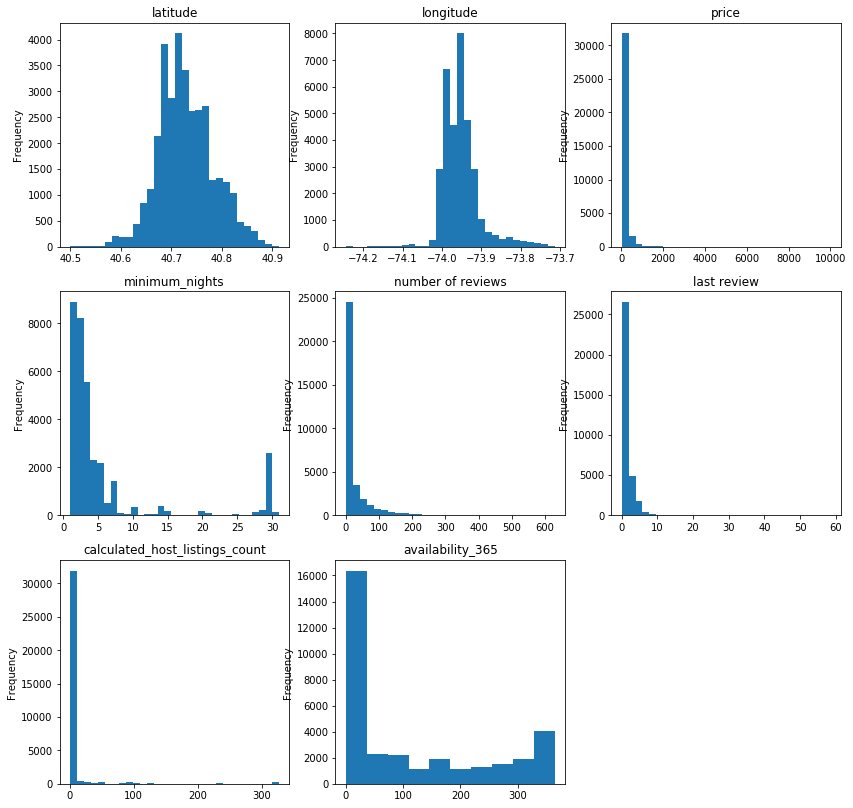

In [7]:
#separate out numerical variables
a=pd.DataFrame(df.dtypes.copy())
b= a[a[0] != 'object'].reset_index()
#drop id and host id:
numeric_vars=b["index"].tolist()[2:]

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)

ax1.hist(df[numeric_vars[0]], bins=30)
ax1.set_ylabel("Frequency")
ax1.set_title(numeric_vars[0])

ax2.hist(df[numeric_vars[1]], bins=30)
ax2.set_ylabel("Frequency")
ax2.set_title(numeric_vars[1])

ax3.hist((df[numeric_vars[2]]), bins=30)
ax3.set_ylabel("Frequency")
ax3.set_title('price')

ax4.hist(df[numeric_vars[3]], bins=31)
ax4.set_ylabel("Frequency")
ax4.set_title(numeric_vars[3])

ax5.hist(df[numeric_vars[4]], bins=30)
ax5.set_ylabel("Frequency")
ax5.set_title("number of reviews")

ax6.hist(df[numeric_vars[5]], bins=30)
ax6.set_ylabel("Frequency")
ax6.set_title("last review")

ax7.hist(df[numeric_vars[6]], bins=30)
ax7.set_ylabel("Frequency")
ax7.set_title(numeric_vars[6])

ax8.hist(df[numeric_vars[7]])
ax8.set_ylabel("Frequency")
ax8.set_title(numeric_vars[7])
plt.show()


In [8]:
numeric_vars

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

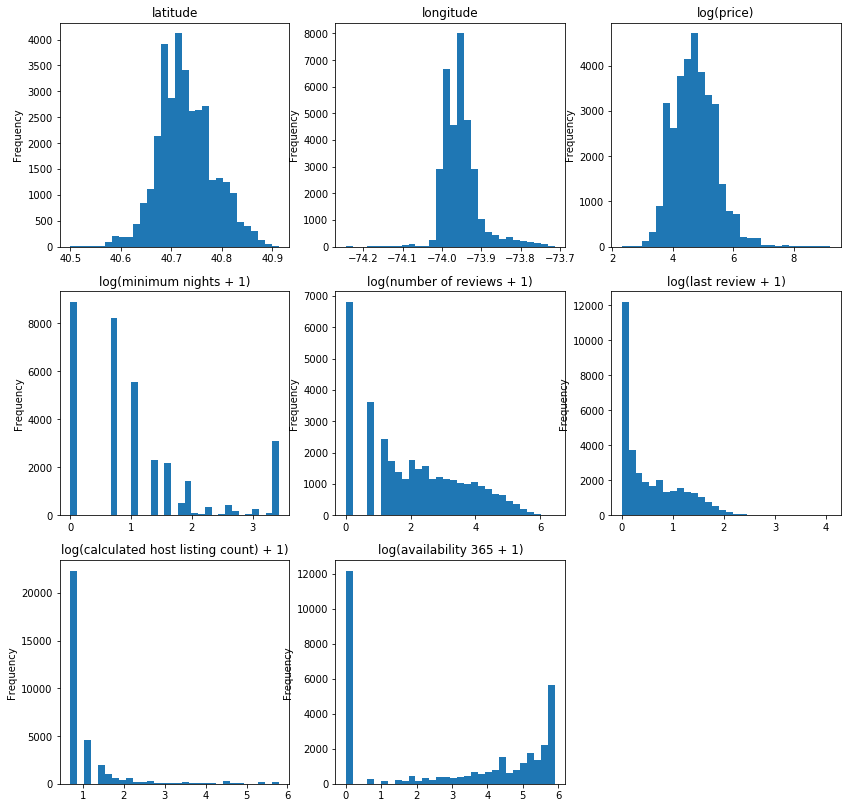

In [9]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)

ax1.hist(df[numeric_vars[0]], bins=30)
ax1.set_ylabel("Frequency")
ax1.set_title(numeric_vars[0])

ax2.hist(df[numeric_vars[1]], bins=30)
ax2.set_ylabel("Frequency")
ax2.set_title(numeric_vars[1])

ax3.hist(np.log((df[numeric_vars[2]])), bins=30)
ax3.set_ylabel("Frequency")
ax3.set_title('log(price)')

ax4.hist(np.log((df[numeric_vars[3]])), bins=31)
ax4.set_ylabel("Frequency")
ax4.set_title("log(minimum nights + 1)")

ax5.hist(np.log(df[numeric_vars[4]]+1), bins=30)
ax5.set_ylabel("Frequency")
ax5.set_title("log(number of reviews + 1)")

ax6.hist(np.log(df[numeric_vars[5]]+1), bins=30)
ax6.set_ylabel("Frequency")
ax6.set_title("log(last review + 1)")

ax7.hist(np.log(df[numeric_vars[6]]+1), bins=30)
ax7.set_ylabel("Frequency")
ax7.set_title("log(calculated host listing count) + 1)")

ax8.hist(np.log(df[numeric_vars[7]]+1), bins=30)
ax8.set_ylabel("Frequency")
ax8.set_title("log(availability 365 + 1)")

plt.show()

In [10]:
for num in numeric_vars[3:]:
    df["log_("+num+" +1)"] = np.log(df[num]+1)
df["log_price"] = np.log(df.price)
df=df.drop(columns = numeric_vars[2:]).copy()

In [11]:
df.columns.tolist()


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'last_review',
 'log_(minimum_nights +1)',
 'log_(number_of_reviews +1)',
 'log_(reviews_per_month +1)',
 'log_(calculated_host_listings_count +1)',
 'log_(availability_365 +1)',
 'log_price']

In [12]:
df.shape


(33824, 16)

In [13]:
numeric_vars = df.columns.tolist()[6:8]+df.columns.tolist()[10:]

In [14]:
numeric_vars


['latitude',
 'longitude',
 'log_(minimum_nights +1)',
 'log_(number_of_reviews +1)',
 'log_(reviews_per_month +1)',
 'log_(calculated_host_listings_count +1)',
 'log_(availability_365 +1)',
 'log_price']

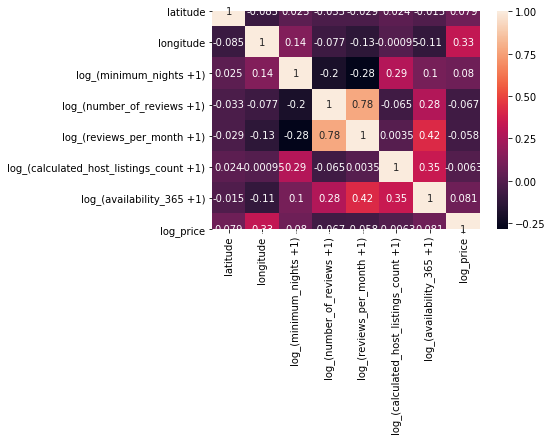

In [15]:
import seaborn as sns
x=df[numeric_vars].apply(lambda x: np.log(np.abs(x+1))).corr(method='pearson')
sns.heatmap(x, annot=True)
plt.show()

In [16]:
#separate out numerical variables
a=pd.DataFrame(df.dtypes.copy())
b= a[a[0] == 'object'].reset_index()
#drop id and host id:
non_num=b["index"].tolist()
print(non_num)

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


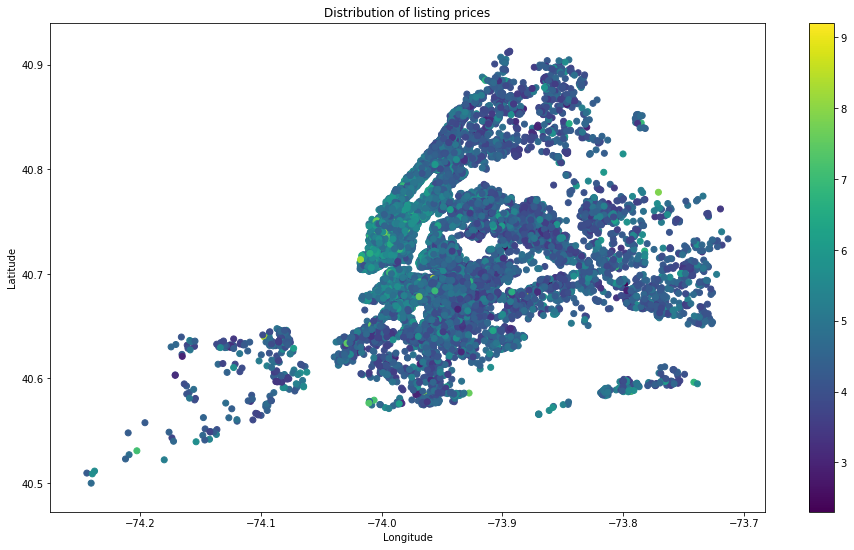

In [17]:
y = df.latitude
x = df.longitude
p = df.log_price
plt.figure(figsize=(16,9))
plt.scatter(x,y,c=p,cmap='viridis')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of listing prices")
plt.show()

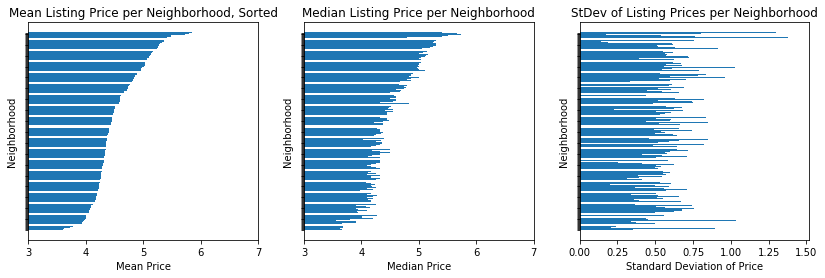

In [18]:
grouped = df.groupby("neighbourhood")
price_grouped = grouped["log_price"]
price = price_grouped.agg([np.mean,np.median,np.max, np.std]).sort_values("mean")


fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.barh(price.index,price["mean"])
ax1.set_yticklabels([])
ax1.set_ylabel("Neighborhood")
ax1.set_xlabel("Mean Price")
ax1.set_title("Mean Listing Price per Neighborhood, Sorted")
ax1.set_xlim(3,7)

ax2.barh(price.index,price["median"])
ax2.set_yticklabels([])
ax2.set_ylabel("Neighborhood")
ax2.set_xlabel("Median Price")
ax2.set_title("Median Listing Price per Neighborhood")
ax2.set_xlim(3,7)

ax3.barh(price.index,price["std"])
ax3.set_yticklabels([])
ax3.set_ylabel("Neighborhood")
ax3.set_xlabel("Standard Deviation of Price")
ax3.set_title("StDev of Listing Prices per Neighborhood")
plt.show()

In [19]:
#One hot encoding
df = pd.concat([df, pd.get_dummies(df["neighbourhood"], drop_first=False)], axis=1)
#save neighborhoods into a list for further analysis:
neighborhoods = df.neighbourhood.values.tolist()
boroughs = df.neighbourhood_group.unique().tolist()
#drop the neighbourhood column from the database
df.drop(['neighbourhood'],axis=1, inplace=True)

In [20]:
df.shape

(33824, 231)

In [21]:
grouped = df.groupby("room_type")
room_type_price_grouped = grouped["log_price"]
room_type_price = room_type_price_grouped.agg([np.mean,np.median,np.max, np.std]).sort_values("mean")
room_type_price

,mean,median,amax,std
room_type,,,,
Shared room,3.962950,3.806662,7.495542,0.659319
Private room,4.295816,4.248495,8.517193,0.511282
Entire home/apt,5.143933,5.075174,9.210340,0.566889


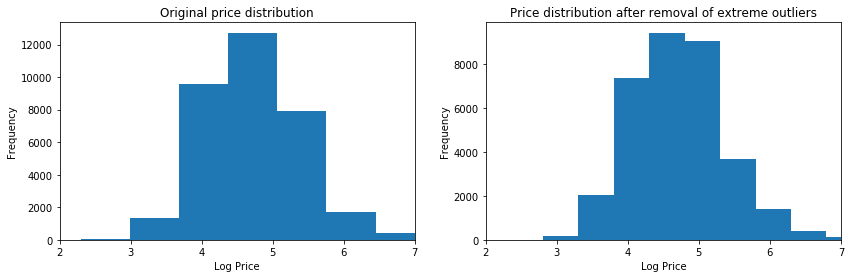

As a result of oulier removal 235 rows of data were removed.


In [22]:
def removal_of_outliers(df,room_t, nhood, distance):
    '''Function removes outliers that are above 3rd quartile and below 1st quartile'''
    '''The exact cutoff distance above and below can be adjusted'''

    new_piece = df[(df["room_type"]==room_t)&(df["neighbourhood_group"]==nhood)]["log_price"]
    #defining quartiles and interquartile range
    q1 = new_piece.quantile(0.25)
    q3 = new_piece.quantile(0.75)
    IQR=q3-q1

    trimmed = df[(df.room_type==room_t)&(df["neighbourhood_group"]==nhood) &(df.log_price>(q1-distance*IQR))&(df.log_price<(q3+distance*IQR))]
    return trimmed

#apply the function
df_private = pd.DataFrame()
for neighborhood in boroughs:
    a = removal_of_outliers(df, "Private room",neighborhood,3)
    df_private = df_private.append(a)

df_shared = pd.DataFrame()
for neighborhood in boroughs:
    a = removal_of_outliers(df, "Shared room",neighborhood,3)
    df_shared = df_shared.append(a)
    
df_apt = pd.DataFrame()
for neighborhood in boroughs:
    a = removal_of_outliers(df, "Entire home/apt",neighborhood,3)
    df_apt = df_apt.append(a)
    
# Create new dataframe to absorb newly produced data    
df_old=df.copy()    
df = pd.DataFrame()
df = df.append([df_private,df_shared,df_apt])

#plot the results
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(df_old.log_price)
ax1.set_xlim(2,7)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Log Price")
ax1.set_title("Original price distribution")

ax2.hist(df.log_price)
ax2.set_xlim(2,7)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Log Price")
ax2.set_title("Price distribution after removal of extreme outliers")
plt.show()

print("As a result of oulier removal " + str(df_old.shape[0]-df.shape[0]) + " rows of data were removed.")

In [23]:
df.shape

(33589, 231)

In [24]:
grouped = df.groupby("room_type")
room_type_price_grouped = grouped["log_price"]
room_type_price = room_type_price_grouped.agg([np.mean,np.median,np.max, np.std]).sort_values("mean")
room_type_price

,mean,median,amax,std
room_type,,,,
Shared room,3.920287,3.806662,6.214608,0.579859
Private room,4.279447,4.248495,6.484635,0.467231
Entire home/apt,5.131351,5.075174,7.296413,0.527534


In [25]:
#convert room types to dummies
df = pd.concat([df, pd.get_dummies(df["room_type"], drop_first=False)], axis=1)
df.drop(['room_type'],axis=1, inplace=True)

In [26]:
df.shape

(33589, 233)

In [27]:
import datetime as dt
#convert object to datetime:
df["last_review"] = pd.to_datetime(df["last_review"])
#Check the latest review date in the datebase:
print(df["last_review"].max())

2019-07-08 00:00:00


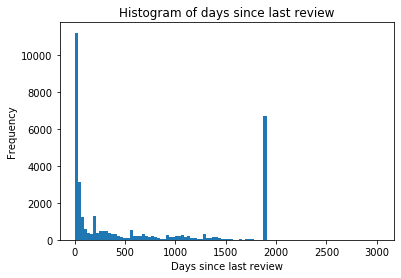

In [28]:
df["last_review"]=df["last_review"].apply(lambda x: dt.datetime(2019,7,8)-x)
df["last_review"]=df["last_review"].dt.days.astype("int").replace(18085, 1900)
plt.hist(df["last_review"], bins=100)
plt.ylabel("Frequency")
plt.xlabel("Days since last review")
plt.ylabel("Frequency")
plt.title("Histogram of days since last review")
plt.show()

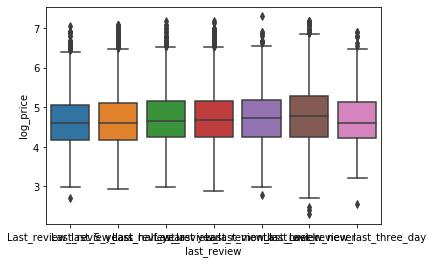

In [29]:
def date_replacement(date):
    if date <=3:
        return "Last_review_last_three_day"
    elif date <= 7:
        return "Last_review_last_week"
    elif date <= 30:
        return "Last_review_last_month"
    elif date <= 183:
        return "Last_review_last_half_year"
    elif date <= 365:
        return "Last_review_last year"
    elif date <= 1825:
        return "Last_review_last_5_years"
    else:
        return "Last_review_never" 

    
df["last_review"]=df["last_review"].apply(lambda x: date_replacement(x))
sns.boxplot(x="last_review", y=df.log_price, data=df)
plt.show()

In [30]:
grouped = df.groupby("last_review")
last_review_price_grouped = grouped["log_price"]
last_review_price = last_review_price_grouped.agg([np.mean,np.median,np.max, np.std]).sort_values("mean")
last_review_price

,mean,median,amax,std
last_review,,,,
Last_review_last_5_years,4.650338,4.605170,7.047517,0.619793
Last_review_last_half_year,4.661811,4.605170,7.090077,0.667224
Last_review_last_three_day,4.708542,4.605170,6.902743,0.645845
Last_review_last year,4.710029,4.653960,7.170120,0.651398
Last_review_last_month,4.718837,4.682131,7.169350,0.642767
Last_review_last_week,4.733381,4.718499,7.296413,0.656101
Last_review_never,4.812408,4.787492,7.181592,0.733766


In [31]:
#convert last review to dummies
df = pd.concat([df, pd.get_dummies(df["last_review"], drop_first=False)], axis=1)
df.drop(["last_review"],axis=1, inplace=True)

In [34]:
df.shape
df = pd.concat([df, pd.get_dummies(df['neighbourhood_group'], drop_first=False)], axis=1)
df.drop(['neighbourhood_group'],axis=1, inplace=True)


In [36]:
df.shape


(33589, 239)

In [35]:
#drop unnecessary columns
df = df.drop(['id','name','host_id','host_name'], axis=1).copy()
#copy for later
df2 = df.copy()
df.shape

(33589, 239)

In [38]:
df.columns

Index(['latitude', 'longitude', 'log_(minimum_nights +1)',
       'log_(number_of_reviews +1)', 'log_(reviews_per_month +1)',
       'log_(calculated_host_listings_count +1)', 'log_(availability_365 +1)',
       'log_price', 'Allerton', 'Arden Heights',
       ...
       'Last_review_last_half_year', 'Last_review_last_month',
       'Last_review_last_three_day', 'Last_review_last_week',
       'Last_review_never', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island'],
      dtype='object', length=239)

In [40]:
#import modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import xgboost as xgb

from sklearn.tree            import DecisionTreeRegressor
from sklearn.neural_network  import MLPRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import r2_score

In [41]:
target = df['log_price'].copy()
#drop unnecessary columns
df = df.drop(['log_price'], axis=1).copy()
#strip the target column from input columns and put it in front
df = pd.concat([target, df], axis=1).copy()
#select input variable columns
nums = df.iloc[:,1:]

In [42]:
df.head()

,log_price,latitude,longitude,log_(minimum_nights +1),log_(number_of_reviews +1),log_(reviews_per_month +1),log_(calculated_host_listings_count +1),log_(availability_365 +1),Allerton,Arden Heights,...,Last_review_last_half_year,Last_review_last_month,Last_review_last_three_day,Last_review_last_week,Last_review_never,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,4.787492,40.72217,-73.99481,2.079442,1.386294,0.058269,1.386294,0.000000,0,0,...,0,0,0,0,0,0,0,1,0,0
14,4.234107,40.76159,-73.99824,1.098612,3.135494,0.494696,1.098612,2.079442,0,0,...,1,0,0,0,0,0,0,1,0,0
23,4.077537,40.87085,-73.91830,1.609438,2.995732,0.609766,0.693147,0.000000,0,0,...,0,0,0,0,0,0,0,1,0,0
31,5.370638,40.81652,-73.94914,1.791759,2.079442,1.316408,2.197225,5.817111,0,0,...,0,1,0,0,0,0,0,1,0,0
60,3.912023,40.80315,-73.94017,2.079442,3.258097,0.405465,0.693147,5.023881,0,0,...,0,1,0,0,0,0,0,1,0,0


In [43]:
print(df.shape)


(33589, 239)


In [44]:
y= target
x = nums
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1)

In [45]:
rmse_dt=[]
dt = DecisionTreeRegressor()
kf = KFold(5, shuffle = True, random_state=1)
mse = cross_val_score(dt ,x,y, scoring = "neg_mean_squared_error", cv=kf) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_dt.append(avg_rmse)
print("Root mean square error: " +str(round(rmse_dt[0],2)))

Root mean square error: 0.55


In [46]:
rmse_rf=[]
rf=RandomForestRegressor(n_estimators = 100, random_state=1,  min_samples_leaf=2)
kf = KFold(5, shuffle = True, random_state=1)
mse = cross_val_score(rf ,x,y, scoring = "neg_mean_squared_error", cv=kf) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_rf.append(avg_rmse)
print(rmse_rf)

[0.39779395568949844]
